## Projeto Sprint 10

### Passo 1. Carregue os dados e prepare-os para a análise

In [1]:
#Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rest_data = pd.read_csv('/datasets/rest_data_us_upd.csv')
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [3]:
#Tranformando os tipos de dados
rest_data['object_name'] = rest_data['object_name'].astype('string')
rest_data['address'] = rest_data['address'].astype('string')
rest_data['object_type'] = rest_data['object_type'].astype('string')
rest_data['chain'] = rest_data['chain'].astype('bool')

In [4]:
#Conferindo atualizações
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   string
 2   address      9651 non-null   string
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   string
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), string(3)
memory usage: 386.5 KB


In [5]:
#Verificando se há valores duplicados
rest_data.duplicated().sum()

0

In [6]:
#Verificando valores ausentes
rest_data.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

#### Comentário da aluna:
Tudo certo com os dados, podemos continuar.

### Passo 2. Análise de dados

In [7]:
#Investigue as proporções de vários tipos de estabelecimentos
#Separando os tipos de estabelecimentos
types = rest_data['object_type'].value_counts()

In [8]:
#Calculando a porproção
proportion = types / types.sum()

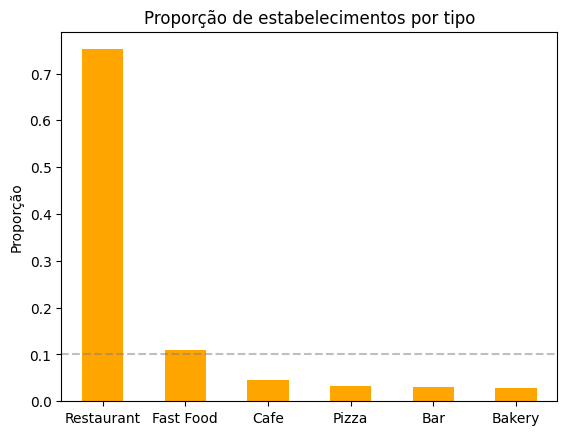

In [9]:
#Fazendo gráfico
fig, ax = plt.subplots()
proportion.sort_values(ascending=False).plot(kind='bar',color='orange', ax=ax)

plt.xticks(rotation=0)
plt.axhline(y= 0.1, color='gray', linestyle='--', alpha=0.5)
plt.ylabel("Proporção")
plt.title("Proporção de estabelecimentos por tipo")
plt.show()

#### Comentário da aluna:
Pelo gráfico é possível ver que o tipo de estabelecimento 'restaurante' tem uma maior proporção, sendo maior que 0.7.
Já o restante fica abaixo de 0.1.
Por serem vários estabelecimento preferi utilizar o gráfico de barras.

In [10]:
#Investigue as proporções de estabelecimentos de rede e não. Construa um gráfico.
#Contando os restaurantes de rede e não
rest_rede = rest_data['chain'].value_counts()

In [11]:
#Calculando a porproção
proportion_rede = rest_rede / rest_rede.sum()

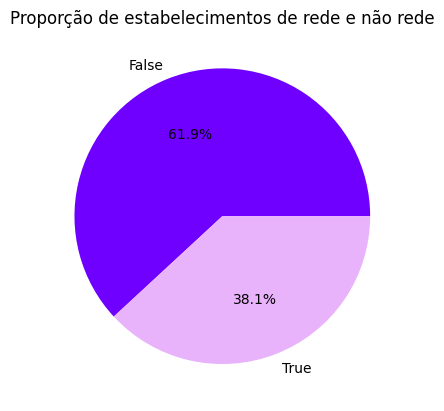

In [12]:
#Fazendo gráfico
proportion_rede.plot(kind='pie', autopct='%1.1f%%', colors=['#6F00FF', '#E9B3FB'])
plt.title("Proporção de estabelecimentos de rede e não rede")
plt.ylabel("") 
plt.show()

#### Comentário da aluna:
A proporção de restaurante de rede é menor do que a proporção de restaurante que não são de rede.
Dessa vez escolhi o gráfico de pizza, pois trata-se da proporção de somente duas variáveis.

In [13]:
#Qual tipo de estabelecimento é típico para redes?
#Fltrando os restaurantes de rede
rede = rest_data[rest_data['chain'] == True]

In [14]:
#Contanto os tipos de restaurante
cont_rede = rede['object_type'].value_counts()

In [15]:
#Contagem total
total = rest_data['object_type'].value_counts()

In [16]:
#Proporção
propor_rede = cont_rede / total

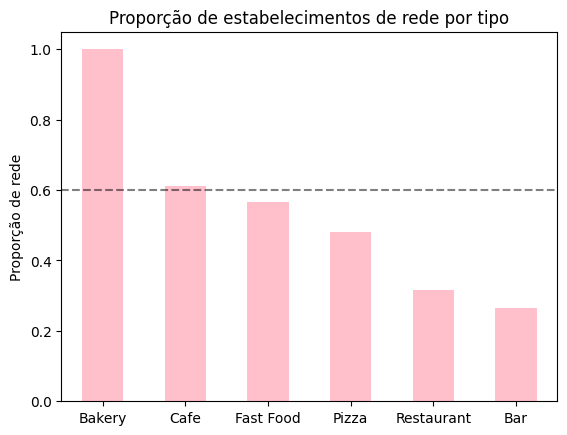

In [17]:
#Fazendo gráfico
fig, ax = plt.subplots()
propor_rede.sort_values(ascending=False).plot(kind='bar',color='pink', ax=ax)

plt.xticks(rotation=0)
plt.axhline(y= 0.6, color='black', linestyle='--', alpha=0.5)
plt.ylabel("Proporção de rede")
plt.title("Proporção de estabelecimentos de rede por tipo")
plt.show()


#### Comentário da aluna: 
Através do gráfico percebemos que a maioria dos estabelecimentos de rede são 'Bakery', ou seja, padarias. E o menor tipo de estabelecimento de rede são bares.

In [18]:
#O que caracteriza redes: muitos estabelecimentos...
#Filtrando os estabelecimentos
rede = rest_data[rest_data['chain'] == True]
nao_rede = rest_data[rest_data['chain'] == False]

In [19]:
print("Rede:")
print(rede['number'].sum())

print("\nNão Rede:")
print(nao_rede['number'].sum())

Rede:
145966

Não Rede:
275736


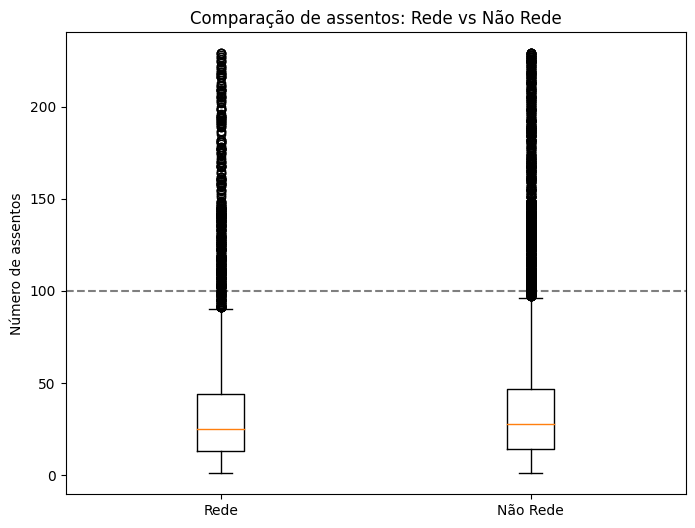

In [20]:
plt.figure(figsize=(8,6))

plt.boxplot([rede['number'], nao_rede['number']], labels=['Rede', 'Não Rede'])
plt.axhline(y= 100, color='black', linestyle='--', alpha=0.5)
plt.ylabel("Número de assentos")
plt.title("Comparação de assentos: Rede vs Não Rede")
plt.show()

#### Comentário da aluna:
Acredito que o que carateriza os estabelecimentos de rede são poucos estabelecimentos com muitos assentos.

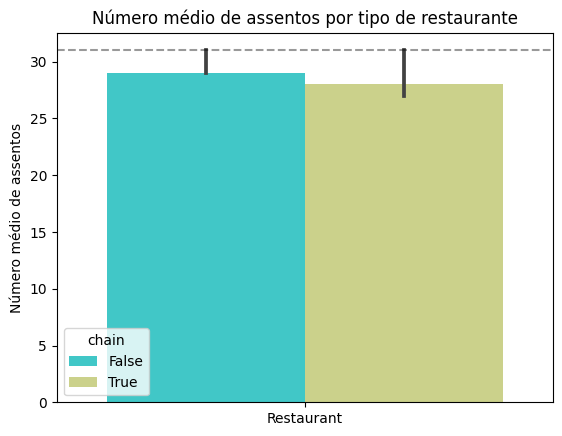

In [21]:
#Determine o número médio de assentos para cada tipo de restaurante
#Criando gráfico
restaurantes = rest_data[rest_data['object_type'] == 'Restaurant']
ax = sns.barplot(x='object_type', y='number', data=restaurantes,hue='chain', estimator=np.median, palette= 'rainbow')

plt.xticks(rotation=0) 
plt.xlabel("")
plt.ylabel("Número médio de assentos")
plt.title("Número médio de assentos por tipo de restaurante")
plt.axhline(y= 31, color='black', linestyle='--', alpha=0.4)
plt.show()

#### Comentário da aluna:
Os restaurantes sem rede possuem mais assentos que os de rede, porém a diferença é muito pouca.?

In [37]:
#Coloque os dados dos nomes das ruas da coluna address em uma coluna separada.
rest_data['street_name'] = rest_data['address'].str.split(n=1).str[1]
print(rest_data['street_name'])

0            N EAGLE ROCK BLVD
1                WORLD WAY 120
2           HOLLYWOOD BLVD 253
3                W SUNSET BLVD
4                ECHO PARK AVE
                 ...          
9646              W TEMPLE AVE
9647               MELROSE AVE
9648            HOLLYWOOD BLVD
9649       S SPRING ST STE 100
9650    S SAN PEDRO ST STE 111
Name: street_name, Length: 9651, dtype: object


In [38]:
#Conferindo nova coluna
print(rest_data.columns)

Index(['id', 'object_name', 'address', 'chain', 'object_type', 'number',
       'street', 'street_name'],
      dtype='object')


In [39]:
#Construa um gráfico de dez ruas com o maior número de restaurantes
#Filtrando apenas estabelecimento do tipo restaurantes
restaurantes = rest_data[rest_data['object_type'] == 'Restaurant']

In [40]:
#Contando as ruas
cont_street = restaurantes['street_name'].value_counts()

In [41]:
#Selecionando as top 10 ruas
top10_street = cont_street.head(10)

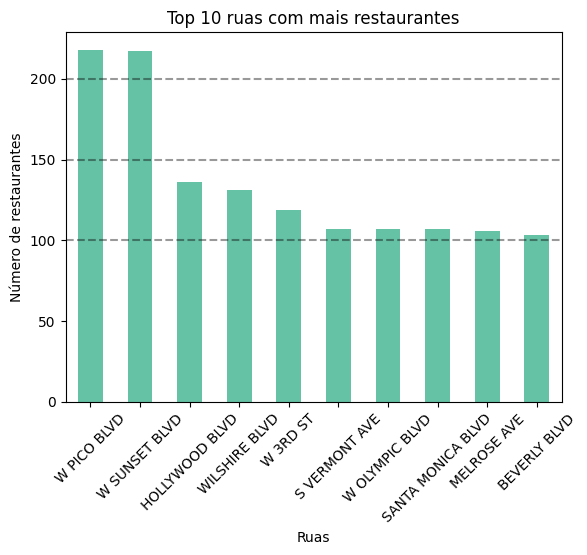

In [46]:
#Fazendo gráfico
top10_street.plot(kind='bar', color='#66c2a5')

plt.xticks(rotation=45)
plt.axhline(y= 100, color='black', linestyle='--', alpha=0.4)
plt.axhline(y= 150, color='black', linestyle='--', alpha=0.4)
plt.axhline(y= 200, color='black', linestyle='--', alpha=0.4)
plt.ylabel("Número de restaurantes")

plt.xlabel("Ruas")
plt.title("Top 10 ruas com mais restaurantes")
plt.show()

#### Comentário da aluna:
A rua W PICO BLDV tem mais de 200 restaurantes! Já a rua BERVERLY BLVD tem pouco mais que 100 restaurantes.

In [47]:
#Encontre o número de ruas que têm apenas um restaurante
#Filtrando ruas com somente um restaurante
rest_1 = cont_street[cont_street == 1]
print('Ruas com apenas um restaurante\n',rest_1)

Ruas com apenas um restaurante
 WILSHIRE BLVD B211      1
BROADWAY AVE            1
NATIONAL BLVD C         1
W 3RD ST STE D101       1
S WESTERN AVE #135      1
                       ..
SANTA MONICA BLVD #1    1
S WESTERN AVE 107       1
S MAPLE AVE STE 101     1
N VIGNES ST STE #6      1
W 4TH ST STE A          1
Name: street_name, Length: 1977, dtype: int64


In [48]:
print('Número total de ruas com apenas um restaurante\n', rest_1.sum())

Número total de ruas com apenas um restaurante
 1977


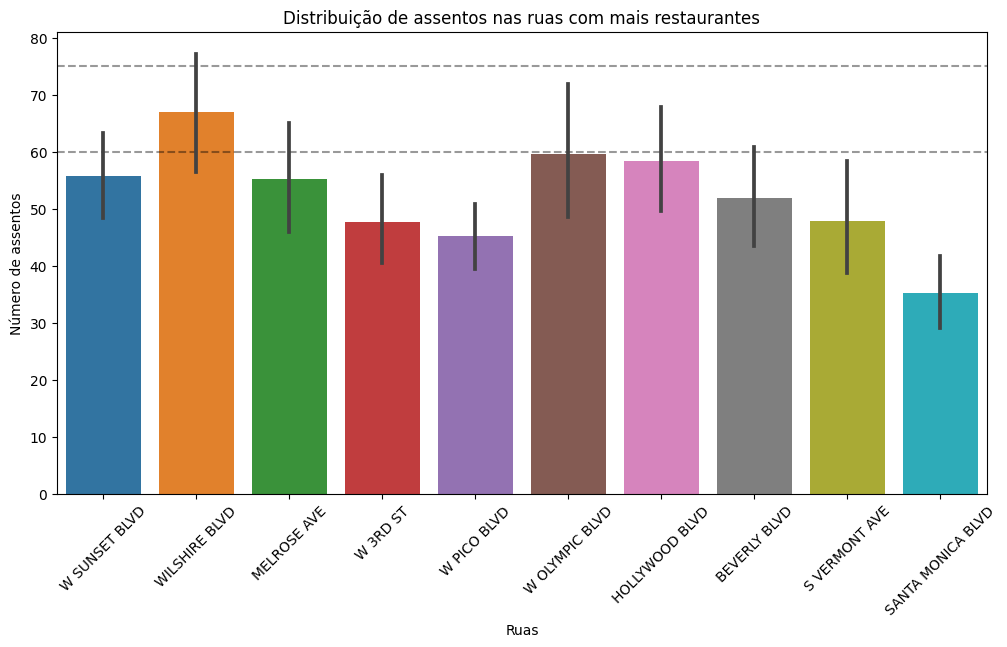

In [55]:
#Para as ruas com muitos restaurantes...
#Pegando as ruas com mais restaurantes
top_ruas = cont_street.head(10).index
#Pegando os restaurantes das ruas
rest_top_ruas = restaurantes[restaurantes['street_name'].isin(top_ruas)]

#Criando gráfico
plt.figure(figsize=(12,6))
plt.axhline(y= 60, color='black', linestyle='--', alpha=0.4)
plt.axhline(y= 75, color='black', linestyle='--', alpha=0.4)
sns.barplot(x='street_name', y='number', data=rest_top_ruas)
plt.xticks(rotation=45)
plt.ylabel("Número de assentos")
plt.xlabel("Ruas")
plt.title("Distribuição de assentos nas ruas com mais restaurantes")
plt.show()

#### Comentário da aluna:
A rua WILSHIRE BLDV é a que mais possui assentos, cerca de 75, mas ela não é a que possui mais restaurantes, trata-se de um restaurante maior que os outros?
Já a rua SANTA MONICA BLDV tem pouco mais que 40 assentos e 100 restaurantes, provavelmente trata-se de restaurantes pequenos.

### Conclusão geral:

Em geral, a maior parte dos estabelecimentos são restaurantes, sendo 61,9% dos estabelecimentos não de rede e somente 38,1% de rede. Quanto ao tipo de estabelecimento que mais pertence a rede, são as padarias. Em relação aos assentos, os estabelecimentos sem rede tem mais assentos, provavelmente porque os estabelecimentos de rede devem seguir um padrão rigoroso. Entretanto, os restaurantes tem um número de assentos muito parecido para os de rede e os sem rede, diferente dos bares que sem rede tem muito mais assentos. 
Além disso, a rua com mais restaurantes (+200) é a  W PICO BLDV. Contudo, o restaurante com mais assentos é o WILSHIRE BLDV, sendo que nessa rua há 100 restaurantes. Será que estamos a lidar com outliers? Ruas com mais restaurantes, porém menos assentos? Seriam restaurantes pequenos? 

### Passo 3. Preparando uma apresentação

Presentation: https://1drv.ms/b/c/980ad84bb187bbb4/Ed5XhnKaJE5Oi6Cq9LmejcIBulsCAK2k6AOVVijm8H4FdQ?e=8pHC7f